In [178]:
from utils import aspect_extraction, sentiment_extraction, general, embeddings, visualizer
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import pickle

In [179]:
import importlib
importlib.reload(aspect_extraction)
importlib.reload(sentiment_extraction)
importlib.reload(general)
importlib.reload(embeddings)
importlib.reload(visualizer)

<module 'utils.visualizer' from '/home/alessia/Documenti/University/Text mining and sentiment analysis/progetto/tinder/utils/visualizer.py'>

In [4]:
def get_query_polarity_percentage(query, aspects_embedding, aspects_adjs, aspects_score, not_query=[], threshold=0.5, verbose=False):
    query_ranking = embeddings.get_query_similarities(
        aspects_embedding, query, not_query=not_query)

    query_ranking = pd.concat([aspects_score, query_ranking], axis=1).rename(columns={
        0: "score", 1: "query_similarity"}).sort_values(by=["query_similarity", "score"], ascending=False)
    query_aspects = query_ranking[query_ranking.query_similarity >=
                                  threshold].index

    pos, neg, avg_polarity = sentiment_extraction.get_aspects_polarity_percentage(
        query_aspects, aspects_adjs, verbose=verbose)

    return pos, neg, avg_polarity, query_aspects, query_ranking


In [5]:
queries_aspects = {}
aspects_polarity = {}

def save_results(app, aspect, queries_aspects, aspects_polarity, aspects, pos, neg, avg):
    if app not in queries_aspects:
        queries_aspects[app] = {}
    if app not in aspects_polarity:
        aspects_polarity[app] = {}

    queries_aspects[app][aspect] = aspects.values
    aspects_polarity[app][aspect] = {}
    aspects_polarity[app][aspect]["pos"] = pos
    aspects_polarity[app][aspect]["neg"] = neg
    aspects_polarity[app][aspect]["avg"] = avg
    return queries_aspects, aspects_polarity
    

## __Tinder__

In [6]:
tinder_aspects_adjs, tinder_aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "tinder")
tinder_aspects_polarity = sentiment_extraction.get_aspects_polarity(tinder_aspects_adjs, app ="tinder")
tinder_aspects_score = general.normalize_series(tinder_aspects_polarity + tinder_aspects_freq)
tinder_aspects_embedding = embeddings.get_aspects_embeddings(tinder_aspects_freq, app="tinder")

__Casual sex__

In [7]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold=0.60)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


100%|██████████| 11699/11699 [00:09<00:00, 1222.35it/s]


In [8]:
queries_aspects, aspects_polarity = save_results("tinder", "casual sex", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}%, negative: {neg:.2f}%, avg: {avg:.2f}")

positive: 52.63%, negative: 47.37%, avg: 0.04


In [9]:
query_ranking.head()

score  query_similarity
sex     0.688649          0.812611
sexual  0.719035          0.792364
sexo    0.741144          0.715993
porn    0.727789          0.679251
sexy    0.755898          0.661601

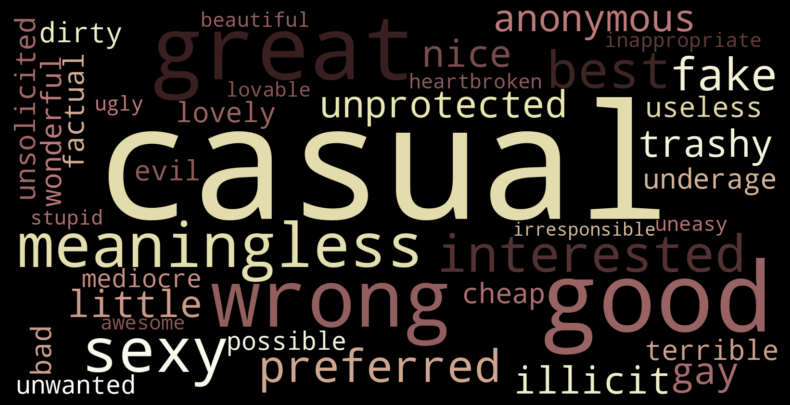

In [10]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [11]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "pos")

  0%|          | 0/52 [00:00<?, ?it/s]

['gay', 'great']


In [12]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "neg")

  0%|          | 0/107 [00:00<?, ?it/s]

['bad', 'wrong']


__Relationship__

In [13]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold=0.72)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


100%|██████████| 11699/11699 [00:09<00:00, 1220.07it/s]


In [14]:
queries_aspects, aspects_polarity = save_results("tinder", "relationship", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}%, negative: {neg:.2f}%, avg: {avg:.2f}")

positive: 79.84%, negative: 20.16%, avg: 0.35


In [15]:
query_ranking.head()

score  query_similarity
relationship  0.844674          0.818718
boyfriend     0.848398          0.805093
couple        0.757699          0.793299
husband       0.777920          0.780680
date          0.773003          0.768525

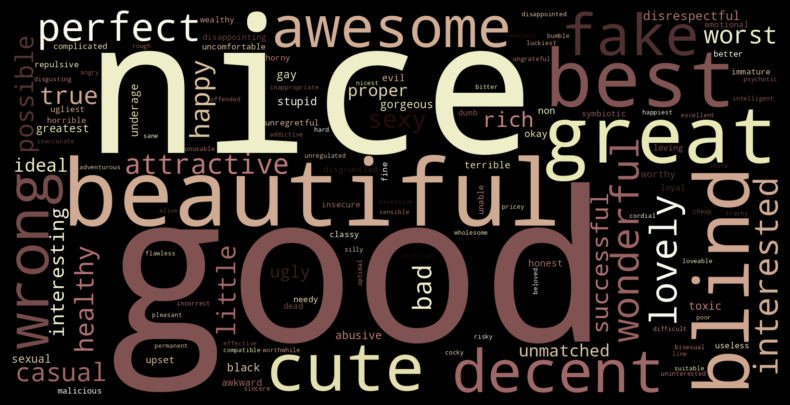

In [16]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [17]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "pos")

  0%|          | 0/724 [00:00<?, ?it/s]

['gay', 'great', 'worthy', 'beloved', 'bisexual']
['good', 'better']
['interested', 'interesting']
['happiest', 'happy']
['ideal', 'like']


In [18]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "neg")

  0%|          | 0/277 [00:00<?, ?it/s]

['poor', 'dead', 'blind', 'needy']
['silly', 'psychotic', 'stupid']
['hard', 'difficult']
['bad', 'wrong']
['disappointed', 'disappointing']
['ugliest', 'ugly']


__Friendship__

In [19]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold=0.70)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


100%|██████████| 11699/11699 [00:11<00:00, 1005.46it/s]


In [20]:
queries_aspects, aspects_polarity = save_results("tinder", "friendship", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg : {avg}")

positive: 93.08, negative: 6.92, avg : 0.48731086392025535


In [21]:
query_ranking.head()

score  query_similarity
relationships  0.823932          0.874245
relationship   0.844674          0.821643
friendship     0.785302          0.785669
friends        1.000000          0.766438
friendships    0.783199          0.758929

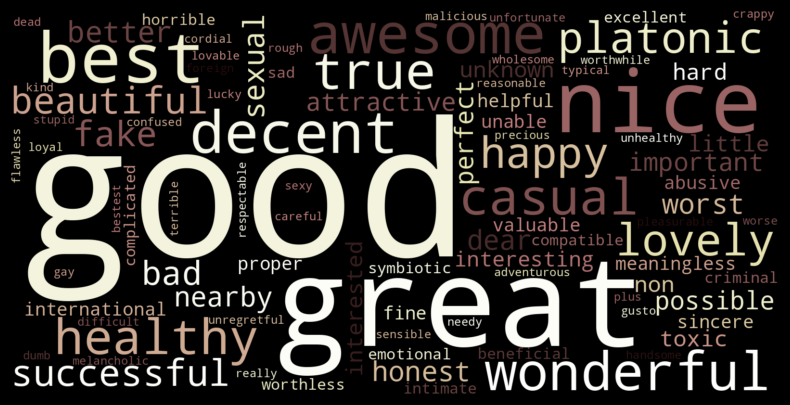

In [22]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [23]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "pos")

  0%|          | 0/979 [00:00<?, ?it/s]

['dear', 'gay', 'intimate', 'great']
['good', 'plus', 'better']
['reasonable', 'sensible']
['interested', 'interesting']
['like', 'kind']


In [24]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "neg")

  0%|          | 0/151 [00:00<?, ?it/s]

['unfortunate', 'stupid', 'melancholic', 'criminal']
['hard', 'difficult']
['bad', 'worse']
['dead', 'needy']
['rough', 'unknown']


__Curiosity__

In [25]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


100%|██████████| 11699/11699 [00:12<00:00, 928.07it/s]


In [26]:
queries_aspects, aspects_polarity = save_results("tinder", "curiosity", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:2f}, avg: {avg}")

positive: 27.59, negative: 72.413793, avg: -0.2389876767576933


In [27]:
query_ranking.head()

score  query_similarity
innovation  0.767460          0.800823
marketing   0.691112          0.769475
technology  0.717650          0.759639
insights    0.736034          0.733622
social      0.730320          0.712820

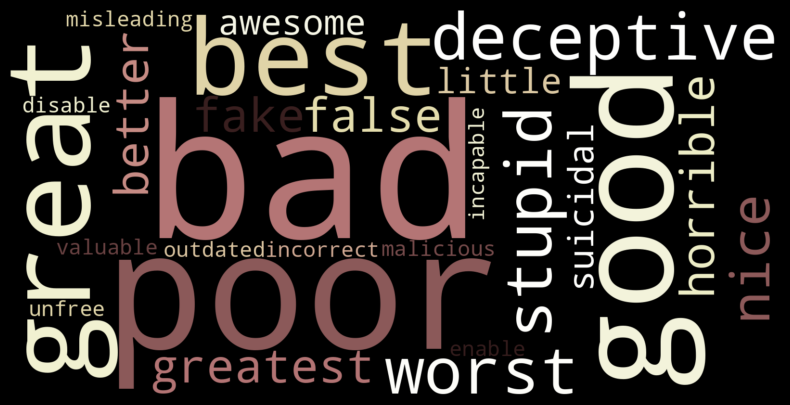

In [28]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [29]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="pos")

  0%|          | 0/25 [00:00<?, ?it/s]

['good', 'better']


In [30]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="neg")

  0%|          | 0/51 [00:00<?, ?it/s]

__Women__

In [31]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold= 0.74)

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']


100%|██████████| 11699/11699 [00:10<00:00, 1069.37it/s]


In [32]:
queries_aspects, aspects_polarity = save_results("tinder", "women", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

positive: 70.91, negative: 29.09, avg: 0.2725763359167602


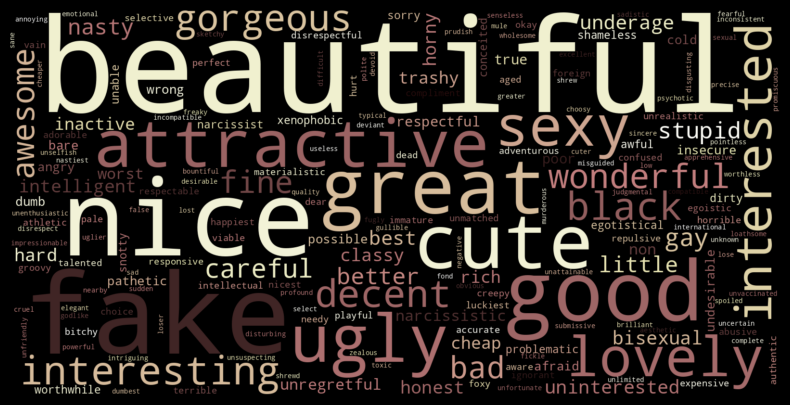

In [33]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [34]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="pos")

  0%|          | 0/1757 [00:00<?, ?it/s]

['dear', 'gay', 'deviant', 'narcissist', 'intellectual', 'great', 'bisexual']
['good', 'quality', 'better']
['okay', 'compliment']
['interested', 'interesting']
['possible', 'choice']
['cuter', 'cute']
['aged', 'rich']
['horny', 'hornier']


In [35]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="neg")

  0%|          | 0/804 [00:00<?, ?it/s]

['stupid', 'unfortunate', 'psychotic', 'loser', 'undesirable', 'shrew']
['lost', 'dead', 'poor', 'needy']
['cheaper', 'cheap']
['nastiest', 'nasty']
['hard', 'difficult']
['ugly', 'uglier']
['bad', 'wrong']
['cold', 'hurt']
['conceited', 'vain']
['dumbest', 'dumb']


__Men__

In [36]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


100%|██████████| 11699/11699 [00:11<00:00, 1062.06it/s]


In [37]:
queries_aspects, aspects_polarity = save_results("tinder", "men", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

positive: 74.46, negative: 25.54, avg: 0.2603492047492943


In [38]:
query_ranking.head()

score  query_similarity
dude  0.760761          0.913715
boy   0.790201          0.886162
guy   0.900945          0.868454
man   0.894146          0.840760
bro   0.736641          0.836664

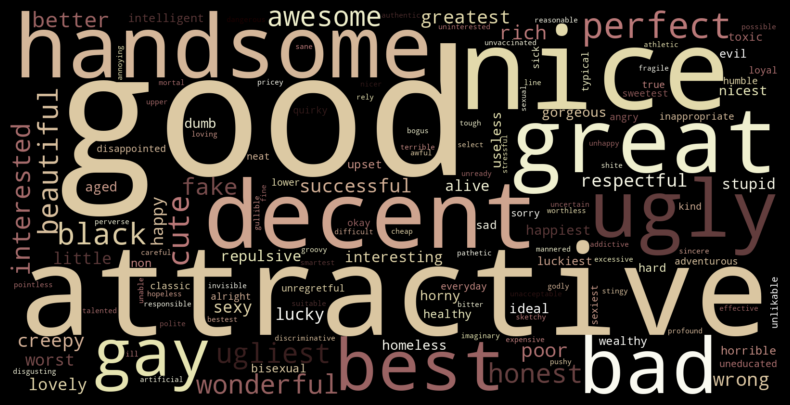

In [39]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [40]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity= "pos")

  0%|          | 0/1002 [00:00<?, ?it/s]

['gay', 'bisexual', 'great']
['good', 'better']
['happiest', 'happy']
['luckiest', 'lucky']
['sexy', 'sexiest']
['nicest', 'nicer']
['ideal', 'kind']
['interested', 'interesting']
['aged', 'rich']


In [41]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="neg")

  0%|          | 0/322 [00:00<?, ?it/s]

['mortal', 'stupid', 'tough', 'homeless']
['ugliest', 'ugly']
['bad', 'wrong']
['sick', 'poor']
['ill', 'upset']
['evil', 'annoying']
['hard', 'difficult']


__Self Esteem__

In [42]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold=0.75)

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


100%|██████████| 11699/11699 [00:10<00:00, 1084.77it/s]


In [43]:
queries_aspects, aspects_polarity = save_results("tinder", "self esteem", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

positive: 54.55, negative: 45.45, avg: 0.06404271852128217


In [44]:
query_ranking.head()

score  query_similarity
self        0.728801          0.862039
yourself    0.729885          0.850462
myself      0.715372          0.794236
confidence  0.742466          0.780320
esteem      0.734661          0.756709

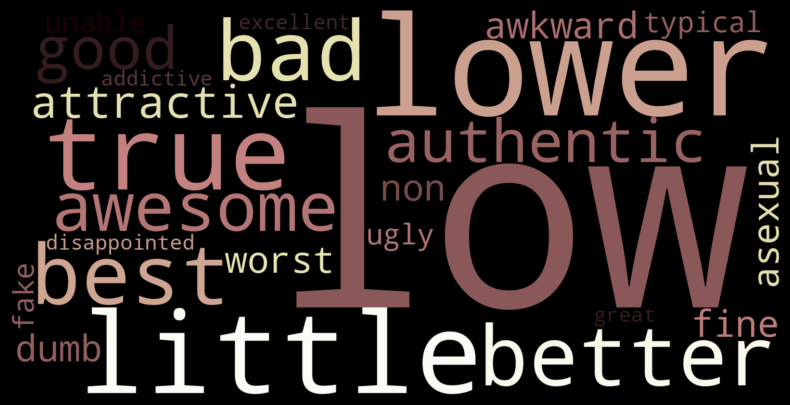

In [45]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [46]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="pos")

  0%|          | 0/22 [00:00<?, ?it/s]

['good', 'better']


In [47]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="neg")

  0%|          | 0/77 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [48]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


100%|██████████| 11699/11699 [00:11<00:00, 1001.94it/s]


In [49]:
queries_aspects, aspects_polarity = save_results("tinder", "attractiveness", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

positive: 48.72, negative: 51.28, avg: -0.004971058944043975


In [50]:
query_ranking.head()

score  query_similarity
appearance      0.730676          0.774414
personality     0.767413          0.741813
attractiveness  0.721867          0.695761
stupidity       0.736286          0.656400
perception      0.709344          0.581319

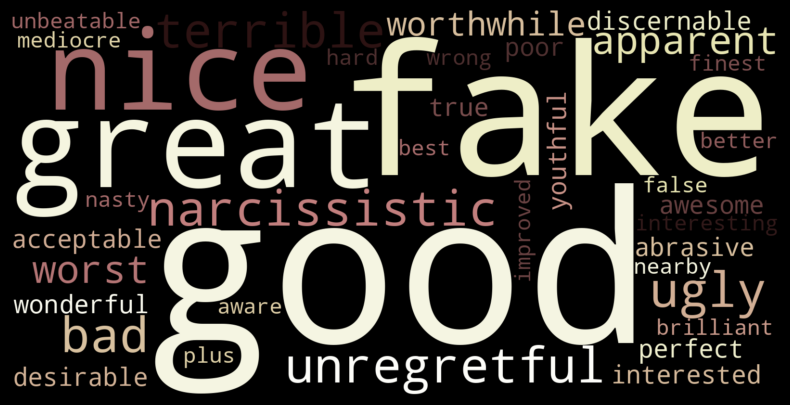

In [51]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [52]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="pos")

  0%|          | 0/41 [00:00<?, ?it/s]

['good', 'plus', 'better']
['interested', 'interesting']


In [53]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="neg")

  0%|          | 0/28 [00:00<?, ?it/s]

['bad', 'wrong']


__Attractiveness (intelligence)__

In [54]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"], aspects_embedding = tinder_aspects_embedding, aspects_adjs = tinder_aspects_adjs, aspects_score = tinder_aspects_score, threshold= 0.6)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


100%|██████████| 11699/11699 [00:11<00:00, 1045.92it/s]


In [55]:
queries_aspects, aspects_polarity = save_results("tinder", "intelligence", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 26.01626016260163, negative: 73.98373983739837, avg: -0.27516819547281407


In [56]:
query_ranking.head()

score  query_similarity
intelligent   0.731253          0.778345
intelligence  0.718626          0.716737
knowledge     0.737076          0.700541
humour        0.728598          0.689580
wise          0.708130          0.668579

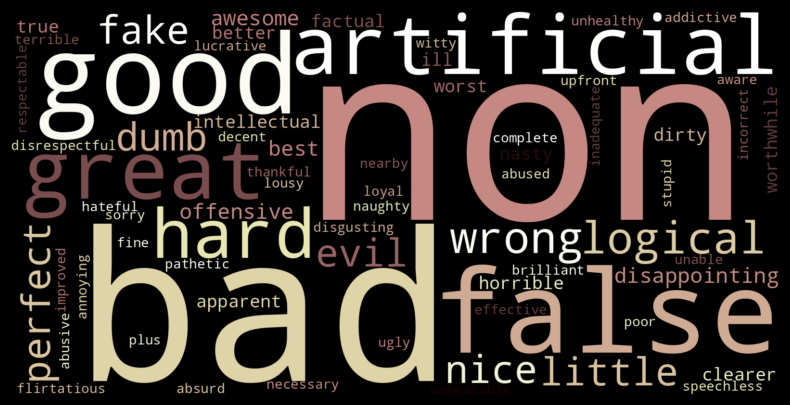

In [57]:
sentiment_extraction.get_wordcloud(query_aspects, tinder_aspects_adjs)

In [58]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="pos")

  0%|          | 0/68 [00:00<?, ?it/s]

['good', 'plus', 'better']
['intellectual', 'great']


In [59]:
neg_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, tinder_aspects_adjs, polarity="neg")

  0%|          | 0/180 [00:00<?, ?it/s]

['evil', 'offensive', 'annoying']
['bad', 'wrong']


## __Bumble__

In [60]:
bumble_aspects_adjs, bumble_aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "bumble")
bumble_aspects_polarity = sentiment_extraction.get_aspects_polarity(bumble_aspects_adjs, app = "bumble")
bumble_aspects_score = general.normalize_series(bumble_aspects_polarity + bumble_aspects_freq)
bumble_aspects_embedding = embeddings.get_aspects_embeddings(bumble_aspects_freq, app = "bumble")

__Casual sex__

In [61]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold=0.5)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


100%|██████████| 5736/5736 [00:05<00:00, 1056.13it/s]


In [62]:
queries_aspects, aspects_polarity = save_results("bumble", "casual sex", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

positive: 68.75, negative: 31.25, avg: 0.22964395811340838


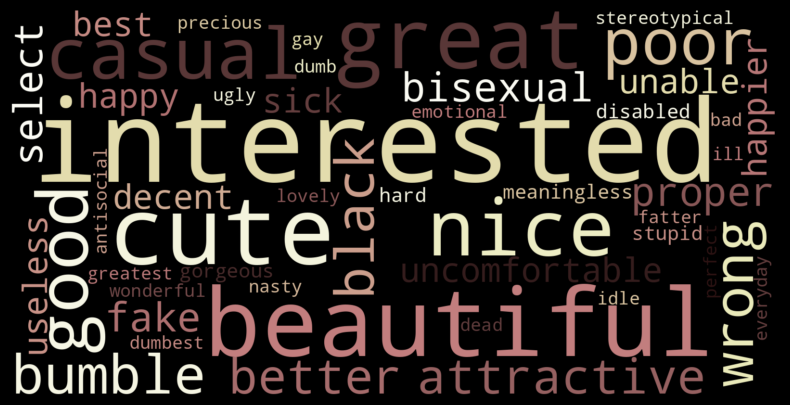

In [63]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [64]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/80 [00:00<?, ?it/s]

['gay', 'bisexual', 'great']
['good', 'better']
['happier', 'happy']


In [65]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/51 [00:00<?, ?it/s]

['sick', 'disabled', 'dead', 'poor']
['bad', 'wrong']
['dumbest', 'dumb']


__Relationship__

In [66]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold=0.72)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


100%|██████████| 5736/5736 [00:04<00:00, 1185.53it/s]


In [67]:
queries_aspects, aspects_polarity = save_results("bumble", "relationship", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos:.2f}, negative: {neg:.2f}, avg: {avg}")

positive: 70.80, negative: 29.20, avg: 0.23161312560978997


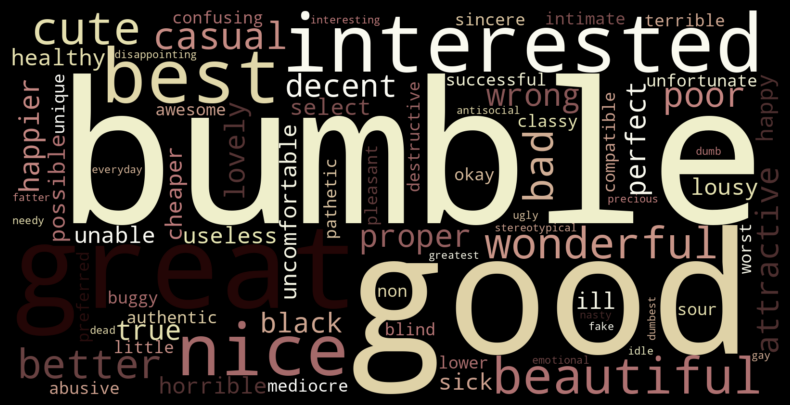

In [68]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [69]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/159 [00:00<?, ?it/s]

['gay', 'intimate', 'great']
['good', 'better']
['happier', 'happy']
['interested', 'interesting']


In [70]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/99 [00:00<?, ?it/s]

['poor', 'sick', 'needy', 'dead', 'blind']
['bad', 'wrong']
['dumbest', 'dumb']


__Friendship__

In [71]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold=0.68)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


100%|██████████| 5736/5736 [00:04<00:00, 1160.66it/s]


In [72]:
queries_aspects, aspects_polarity = save_results("bumble", "friendship", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 72.20367278797997, negative: 27.79632721202003, avg: 0.24692714728332182


In [73]:
query_ranking.head()

score  query_similarity
relationships  0.767987          0.874245
relationship   0.783984          0.821643
friendship     0.658832          0.785669
friends        0.849506          0.766438
friendships    0.710590          0.758929

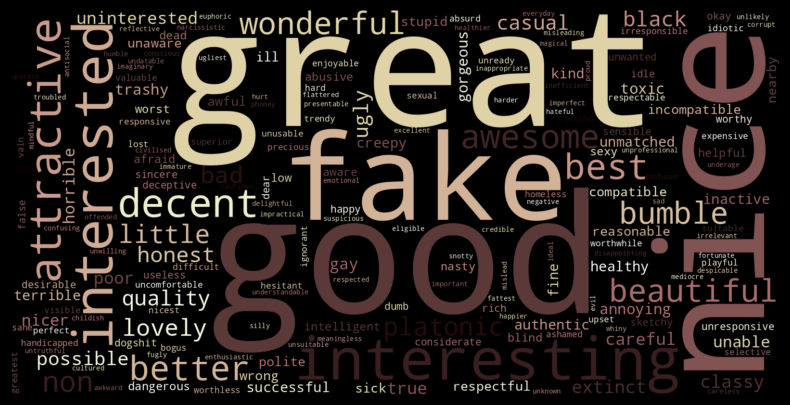

In [74]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [75]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/1636 [00:00<?, ?it/s]

['dear', 'gay', 'great', 'worthy', 'superior']
['good', 'quality', 'better']
['ideal', 'like', 'kind']
['elderly', 'rich', 'cautious']
['happier', 'happy']
['interested', 'interesting']
['reasonable', 'sensible']
['nicest', 'nicer']


In [76]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/758 [00:00<?, ?it/s]

['lost', 'poor', 'sick', 'dead', 'blind', 'handicapped']
['bad', 'wrong', 'worse']
['hard', 'difficult', 'harder']
['ill', 'hurt', 'upset']
['silly', 'stupid', 'homeless']
['confusing', 'confused']
['ugliest', 'ugly']
['evil', 'annoying']
['misleading', 'mislead']


__Curiosity__

In [77]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


100%|██████████| 5736/5736 [00:04<00:00, 1159.74it/s]


In [78]:
print("no relevant aspects")
query_ranking.head()

no relevant aspects


score  query_similarity
innovation   0.683675          0.800823
marketing    0.661105          0.769475
technology   0.662968          0.759639
insights     0.685371          0.733622
development  0.657567          0.710748

In [79]:
queries_aspects, aspects_polarity = save_results("bumble", "curiosity", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}")

positive: 47.368421052631575, negative: 52.63157894736842


__Women__

In [80]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"],aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold= 0.74)

expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']


100%|██████████| 5736/5736 [00:05<00:00, 1092.06it/s]


In [81]:
queries_aspects, aspects_polarity = save_results("bumble", "women", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 76.88229056203606, negative: 23.117709437963946, avg: 0.31547134841833907


In [82]:
query_ranking.head()

score  query_similarity
women    0.646368          0.917901
girls    0.656983          0.855811
ladies   0.923021          0.818926
females  0.662736          0.801617
chicks   0.621706          0.740175

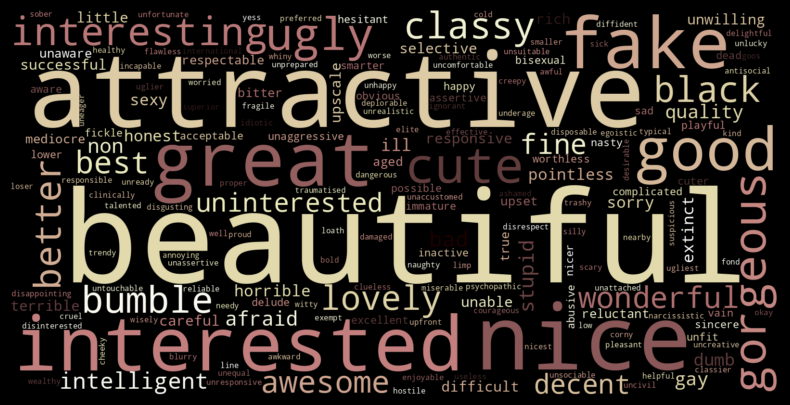

In [84]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [86]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/1021 [00:00<?, ?it/s]

['gay', 'bisexual', 'superior', 'great']
['good', 'quality', 'better']
['aged', 'elite', 'rich']
['interested', 'interesting']
['cuter', 'cute']
['like', 'kind']
['well', 'disposable']
['classy', 'classier']
['nicest', 'nicer']


In [87]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/422 [00:00<?, ?it/s]

['stupid', 'unfortunate', 'silly', 'loser', 'untouchable']
['sick', 'dead', 'needy']
['ugliest', 'ugly', 'uglier']
['reluctant', 'loath']
['bad', 'worse']
['ill', 'upset']


__Men__

In [88]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


100%|██████████| 5736/5736 [00:05<00:00, 1071.19it/s]


In [89]:
queries_aspects, aspects_polarity = save_results("bumble", "men", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 67.3913043478261, negative: 32.608695652173914, avg: 0.16772172126683402


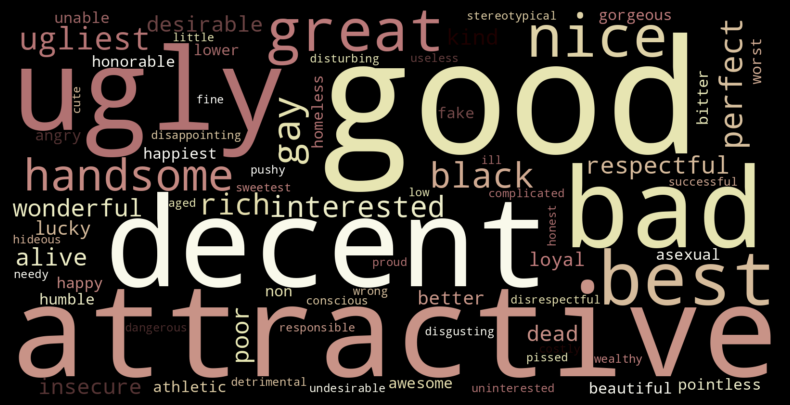

In [90]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [91]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/351 [00:00<?, ?it/s]

['good', 'better']
['gay', 'great']
['aged', 'rich']
['like', 'kind']
['happiest', 'happy']
['honorable', 'honest']


In [92]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/146 [00:00<?, ?it/s]

['dead', 'poor', 'needy']
['ugliest', 'ugly']
['bad', 'wrong']
['homeless', 'undesirable']


__Self esteem__

In [93]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold=0.75)

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


100%|██████████| 5736/5736 [00:05<00:00, 1143.55it/s]


In [94]:
queries_aspects, aspects_polarity = save_results("bumble", "self esteem", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 40.0, negative: 60.0, avg: -0.12494534883720929


In [95]:
query_ranking.head()

score  query_similarity
self        0.667719          0.862039
myself      0.658253          0.794236
confidence  0.659440          0.780320
esteem      0.627702          0.756709
them        0.655270          0.686078

too few data


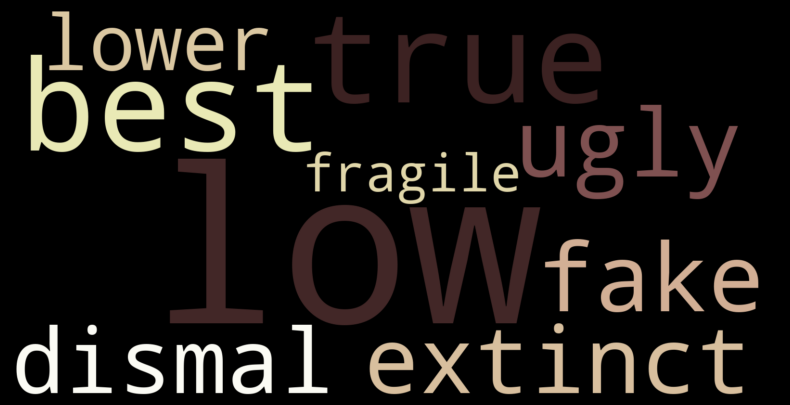

In [96]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [97]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/4 [00:00<?, ?it/s]

In [98]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/18 [00:00<?, ?it/s]

__Attractiveness (appearence)__

In [99]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


100%|██████████| 5736/5736 [00:05<00:00, 1082.04it/s]


In [100]:
queries_aspects, aspects_polarity = save_results("bumble", "attractiveness", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 68.42105263157895, negative: 31.57894736842105, avg: 0.15974176752040528


In [101]:
query_ranking.head()[:30]

score  query_similarity
appearance      0.644547          0.774414
personality     0.706103          0.741813
attractiveness  0.640983          0.695761
stupidity       0.673023          0.656400
beauty          0.674272          0.561083

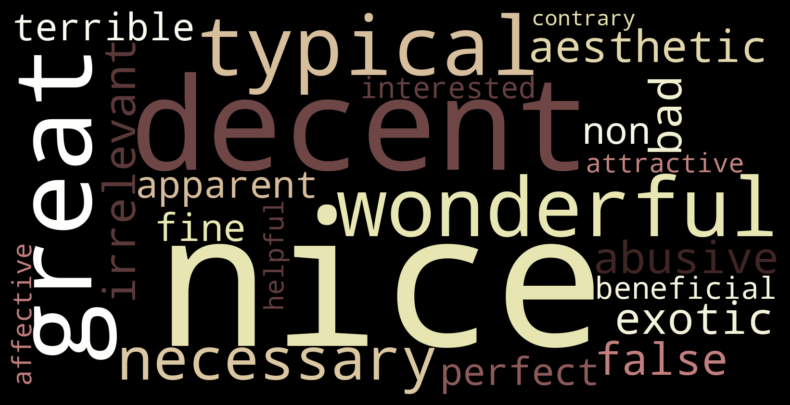

In [102]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [103]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/30 [00:00<?, ?it/s]

In [104]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/6 [00:00<?, ?it/s]

__Attractiveness (intelligence)__

In [105]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"],aspects_embedding = bumble_aspects_embedding, aspects_adjs = bumble_aspects_adjs, aspects_score = bumble_aspects_score, threshold= 0.6)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


100%|██████████| 5736/5736 [00:05<00:00, 1134.36it/s]


In [106]:
queries_aspects, aspects_polarity = save_results("bumble", "intelligence", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 51.06382978723404, negative: 48.93617021276596, avg: -0.0022030596324815483


In [107]:
query_ranking.head()

score  query_similarity
intelligence   0.663915          0.716737
knowledge      0.636754          0.700541
wise           0.658084          0.668579
sense          0.720696          0.632691
understanding  0.665585          0.621662

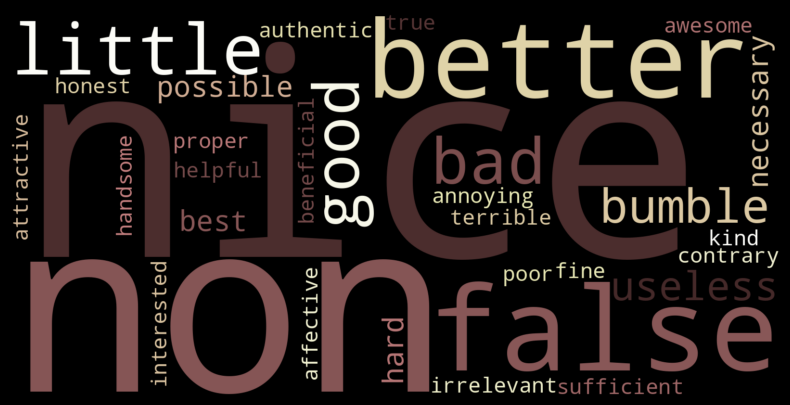

In [108]:
sentiment_extraction.get_wordcloud(query_aspects, bumble_aspects_adjs)

In [109]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "pos")

  0%|          | 0/37 [00:00<?, ?it/s]

['good', 'better']


In [110]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, bumble_aspects_adjs, polarity= "neg")

  0%|          | 0/52 [00:00<?, ?it/s]

## __Hinge__

In [111]:
hinge_aspects_adjs, hinge_aspects_freq = aspect_extraction.get_aspects_adjs_and_freq(app= "hinge")
hinge_aspects_polarity = sentiment_extraction.get_aspects_polarity(hinge_aspects_adjs, app ="hinge")
hinge_aspects_score = general.normalize_series(hinge_aspects_polarity + hinge_aspects_freq)
hinge_aspects_embedding = embeddings.get_aspects_embeddings(hinge_aspects_freq, app="hinge")

__Casual sex__

In [112]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["sex", "casual"], not_query= ["couple"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold=0.60)

expansion: ['sex', 'casual', 'sexual', 'sexo', 'sensual', 'anal', 'erotic']


100%|██████████| 3711/3711 [00:02<00:00, 1411.28it/s]


In [113]:
queries_aspects, aspects_polarity = save_results("hinge", "casual sex", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 50.0, negative: 50.0, avg: 0.005208333333333343


In [114]:
query_ranking.head()

score  query_similarity
sex      0.337593          0.812611
lesbian  0.357330          0.612015
gay      0.343410          0.589886
fetish   0.349358          0.544196
adult    0.347150          0.529873

too few data


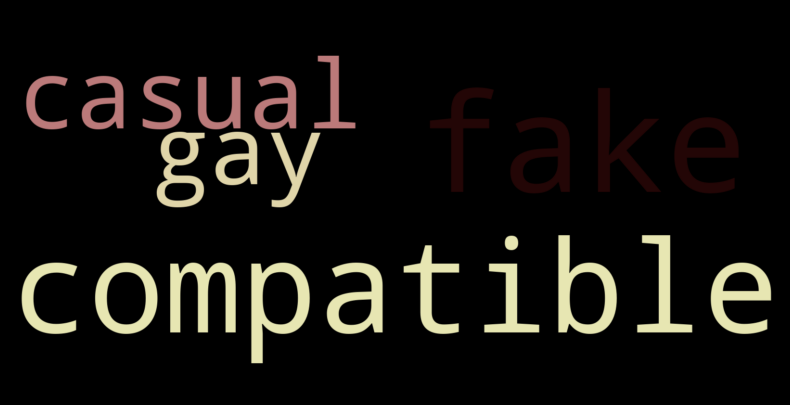

In [115]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

__Relationship__

In [116]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["relationship", "romantic", "couple"], not_query= ["friendship"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold=0.73)

expansion: ['relationship', 'romantic', 'couple', 'married', 'boyfriend', 'husband', 'date', 'couples']


100%|██████████| 3711/3711 [00:02<00:00, 1379.50it/s]


In [117]:
queries_aspects, aspects_polarity = save_results("hinge", "relationship", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 62.06896551724138, negative: 37.93103448275862, avg: 0.13155545559451615


In [118]:
query_ranking.head()

score  query_similarity
married       0.350399          0.822804
relationship  0.437403          0.818718
boyfriend     0.367113          0.805093
couple        0.383327          0.793299
husband       0.366603          0.780680

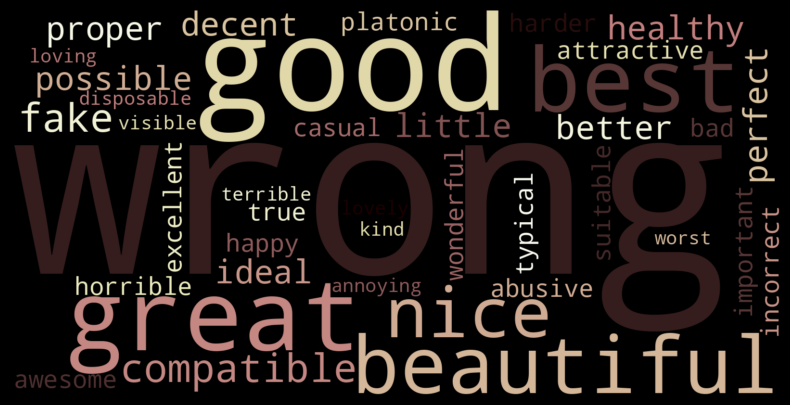

In [119]:
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

In [120]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "pos")

  0%|          | 0/58 [00:00<?, ?it/s]

['good', 'better']
['ideal', 'kind']


In [121]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "neg")

  0%|          | 0/33 [00:00<?, ?it/s]

['bad', 'wrong']


__Friendship__

In [122]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query= ["friendship", "friends", "networking"], not_query= ["love"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold=0.69)

expansion: ['friendship', 'friends', 'networking', 'relationships', 'connections', 'relationship', 'social', 'friendships']


100%|██████████| 3711/3711 [00:03<00:00, 1027.07it/s]


In [123]:
queries_aspects, aspects_polarity = save_results("hinge", "friendship", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 75.79281183932348, negative: 24.207188160676534, avg: 0.2623064713546836


In [124]:
query_ranking.head()

score  query_similarity
relationships  0.393510          0.874245
relationship   0.437403          0.821643
friendship     0.345118          0.785669
friends        0.408134          0.766438
friendships    0.356517          0.758929

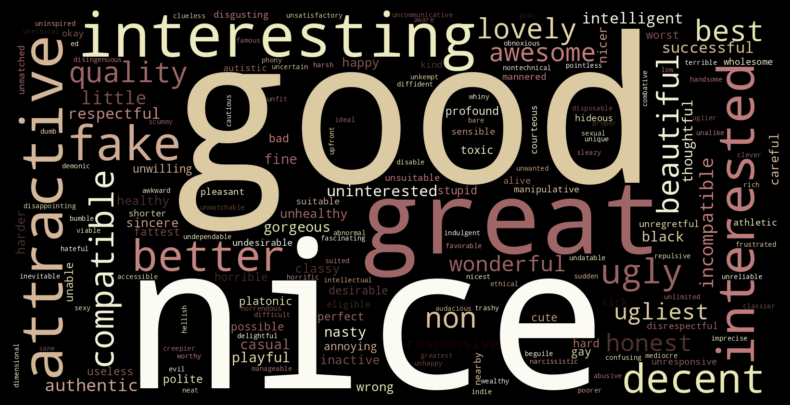

In [125]:
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

In [126]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "pos")

  0%|          | 0/1244 [00:00<?, ?it/s]

['worthy', 'gay', 'intellectual', 'great']
['good', 'quality', 'better']
['ideal', 'like', 'kind']
['interested', 'interesting']
['rich', 'cautious']
['nicest', 'nicer']
['classy', 'classier']


In [127]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "neg")

  0%|          | 0/452 [00:00<?, ?it/s]

['hard', 'difficult', 'harder']
['ugliest', 'ugly', 'uglier']
['frustrated', 'disappointing']
['bad', 'wrong']
['terrible', 'horrendous']
['evil', 'annoying']
['stupid', 'undesirable']
['sick', 'poor']
['horrific', 'hideous']
['worst', 'inevitable']


__Curiosity__

In [128]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["curiosity", "exploration", "social"], not_query= ["space"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold=0.70)

expansion: ['curiosity', 'exploration', 'social', 'discovery', 'innovation', 'insights', 'marketing', 'acquisition']


100%|██████████| 3711/3711 [00:02<00:00, 1295.04it/s]


In [129]:
queries_aspects, aspects_polarity = save_results("hinge", "curiosity", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 33.33333333333333, negative: 66.66666666666666, avg: -0.23152038593215066


In [130]:
print("no relevant data")
query_ranking.head()

no relevant data


score  query_similarity
innovation   0.351152          0.800823
marketing    0.329376          0.769475
technology   0.351439          0.759639
development  0.323791          0.710748
discovery    0.349149          0.705888

__Women__

In [131]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(query = ["women", "girls"], not_query= ["boy"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold= 0.74)


expansion: ['women', 'girls', 'females', 'ladies', 'womens', 'feminists', 'models']


100%|██████████| 3711/3711 [00:03<00:00, 1185.79it/s]


In [132]:
queries_aspects, aspects_polarity = save_results("hinge", "women", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 70.47619047619048, negative: 29.523809523809526, avg: 0.20807240826873408


In [133]:
query_ranking.head()

score  query_similarity
women    0.575804          0.917901
girls    0.523793          0.855811
ladies   0.394191          0.818926
females  0.332899          0.801617
chicks   0.358825          0.740175

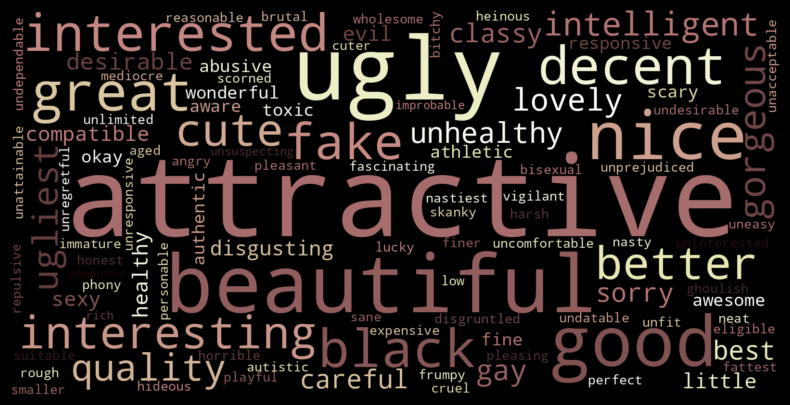

In [134]:
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

In [135]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "pos")

  0%|          | 0/426 [00:00<?, ?it/s]

['good', 'quality', 'better']
['gay', 'bisexual', 'great']
['interested', 'interesting']
['aged', 'rich']
['cuter', 'cute']


In [136]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "neg")

  0%|          | 0/178 [00:00<?, ?it/s]

['brutal', 'cruel']
['ugliest', 'ugly']
['nastiest', 'nasty']


__Men__

In [137]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["man", "boy", "guy"], not_query=["girls", "women"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold= 0.84)

expansion: ['man', 'boy', 'guy', 'dude', 'he', 'brother', 'bro', 'boi']


100%|██████████| 3711/3711 [00:02<00:00, 1437.68it/s]


In [138]:
queries_aspects, aspects_polarity = save_results("hinge", "men", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 85.04672897196261, negative: 14.953271028037381, avg: 0.34313201594898124


In [139]:
query_ranking.head()

score  query_similarity
dude  0.377032          0.913715
boy   0.341643          0.886162
guy   0.524169          0.868454
man   0.449236          0.840760
bro   0.346085          0.836664

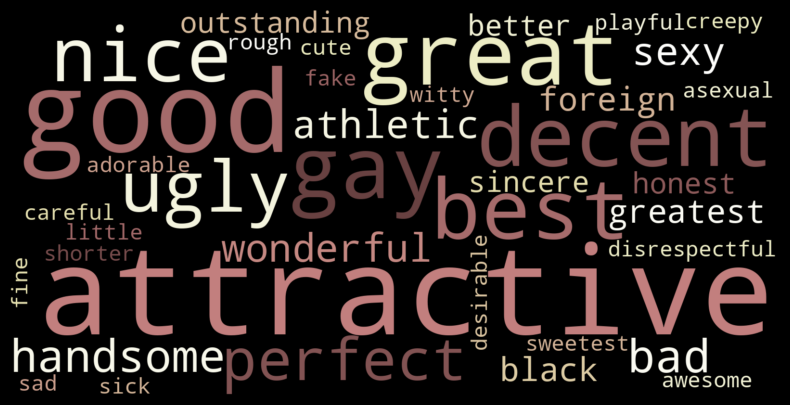

In [140]:
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

In [141]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "pos")

  0%|          | 0/145 [00:00<?, ?it/s]

['good', 'better']
['gay', 'great']


In [142]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "neg")

  0%|          | 0/24 [00:00<?, ?it/s]

__Self esteem__

In [143]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["self", "esteem"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold=0.75)

expansion: ['self', 'esteem', 'confidence', 'yourself', 'self-esteem', 'myself', 'themselves']


100%|██████████| 3711/3711 [00:03<00:00, 1097.50it/s]


In [144]:
queries_aspects, aspects_polarity = save_results("hinge", "self esteem", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 100.0, negative: 0.0, avg: 0.4547558139534884


In [145]:
query_ranking.head()

score  query_similarity
self        0.366936          0.862039
myself      0.348597          0.794236
confidence  0.338839          0.780320
esteem      0.331798          0.756709
them        0.356207          0.686078

too few data


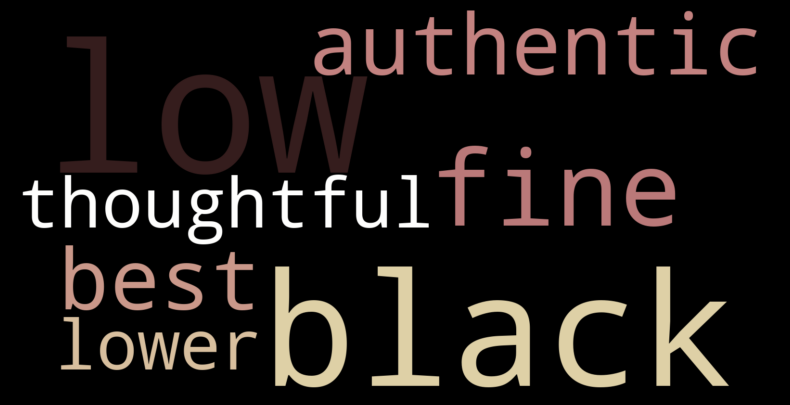

In [146]:
print("too few data")
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

__Attractiveness (appearence)__

In [147]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["attractiveness", "appearence", "beauty"], aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold=0.55)

expansion: ['attractiveness', 'appearence', 'beauty', 'appearance', 'apperance', 'personality', 'sexiness', 'stupidity']


100%|██████████| 3711/3711 [00:03<00:00, 1100.44it/s]


In [148]:
queries_aspects, aspects_polarity = save_results("hinge", "attractiveness", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 83.33333333333334, negative: 16.666666666666664, avg: 0.3348004938271605


In [149]:
query_ranking.head()

score  query_similarity
appearance      0.349813          0.774414
personality     0.372749          0.741813
attractiveness  0.342046          0.695761
beauty          0.346743          0.561083
ability         0.406160          0.550966

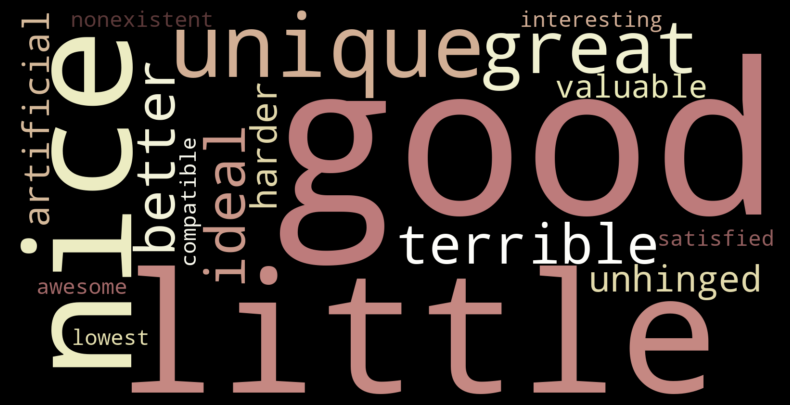

In [150]:
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

In [151]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "pos")

  0%|          | 0/20 [00:00<?, ?it/s]

['good', 'better']
['ideal', 'like']


In [152]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "neg")

  0%|          | 0/11 [00:00<?, ?it/s]

__Attractiveness (intelligence)__

In [153]:
pos, neg, avg, query_aspects, query_ranking = get_query_polarity_percentage(["witty", "intelligence"],aspects_embedding = hinge_aspects_embedding, aspects_adjs = hinge_aspects_adjs, aspects_score = hinge_aspects_score, threshold= 0.6)

expansion: ['witty', 'intelligence', 'intelligent', 'clever', 'humour', 'knowledge', 'profound']


100%|██████████| 3711/3711 [00:03<00:00, 1071.04it/s]


In [154]:
queries_aspects, aspects_polarity = save_results("hinge", "intelligence", queries_aspects, aspects_polarity, query_aspects, pos, neg, avg)
print(f"positive: {pos}, negative: {neg}, avg: {avg}")

positive: 84.61538461538461, negative: 15.384615384615385, avg: 0.3773059782592136


In [155]:
query_ranking.head()

score  query_similarity
intelligence   0.351852          0.716737
knowledge      0.338011          0.700541
wise           0.339466          0.668579
sense          0.374515          0.632691
understanding  0.369933          0.621662

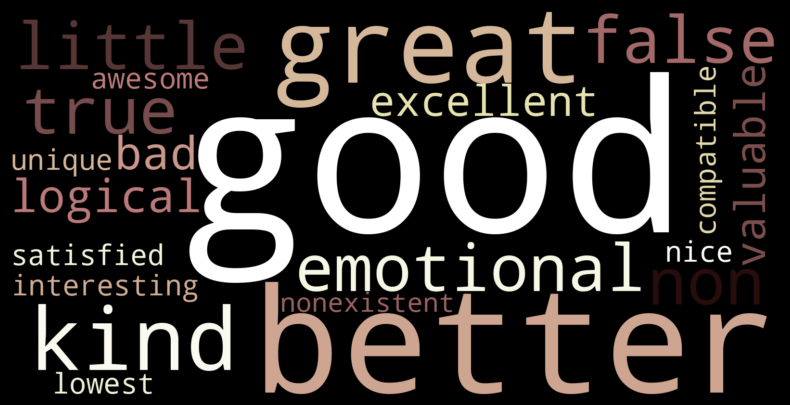

In [156]:
sentiment_extraction.get_wordcloud(query_aspects, hinge_aspects_adjs)

In [157]:
pos_clusters, G = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "pos")

  0%|          | 0/32 [00:00<?, ?it/s]

['good', 'better']
['like', 'kind']


In [158]:
neg_clusters, G  = aspect_extraction.cluster_query_adjs(query_aspects, hinge_aspects_adjs, polarity= "neg")

  0%|          | 0/11 [00:00<?, ?it/s]

In [159]:
with open("data/lexicon_query_aspects.pickle", "wb+") as f:
    pickle.dump(queries_aspects, f)

In [160]:
with open("data/lexicon_aspects_polarities.pickle", "wb+") as f:
    pickle.dump(aspects_polarity, f)

## __Comparing__

In [169]:
with open("data/lexicon_aspects_polarities.pickle", "rb+") as f:
    dating_app_polarities = pickle.load(f)

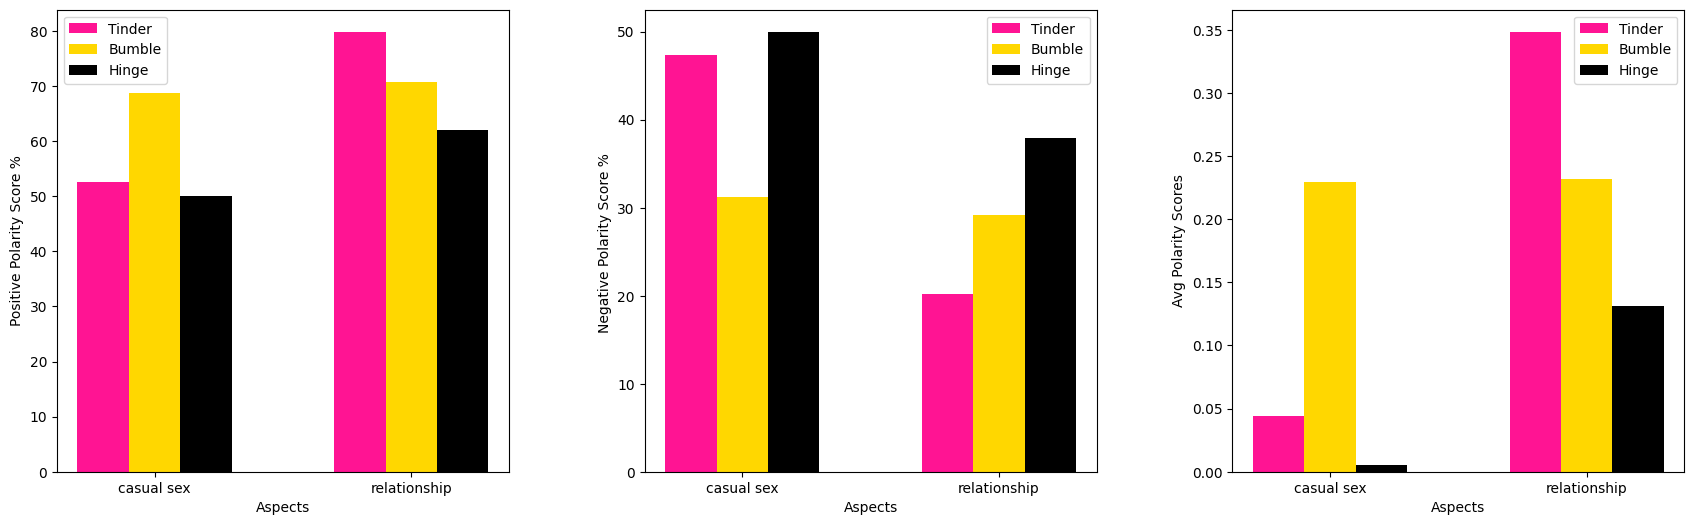

In [180]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects = ["casual sex", "relationship"], figsize=(21,6))

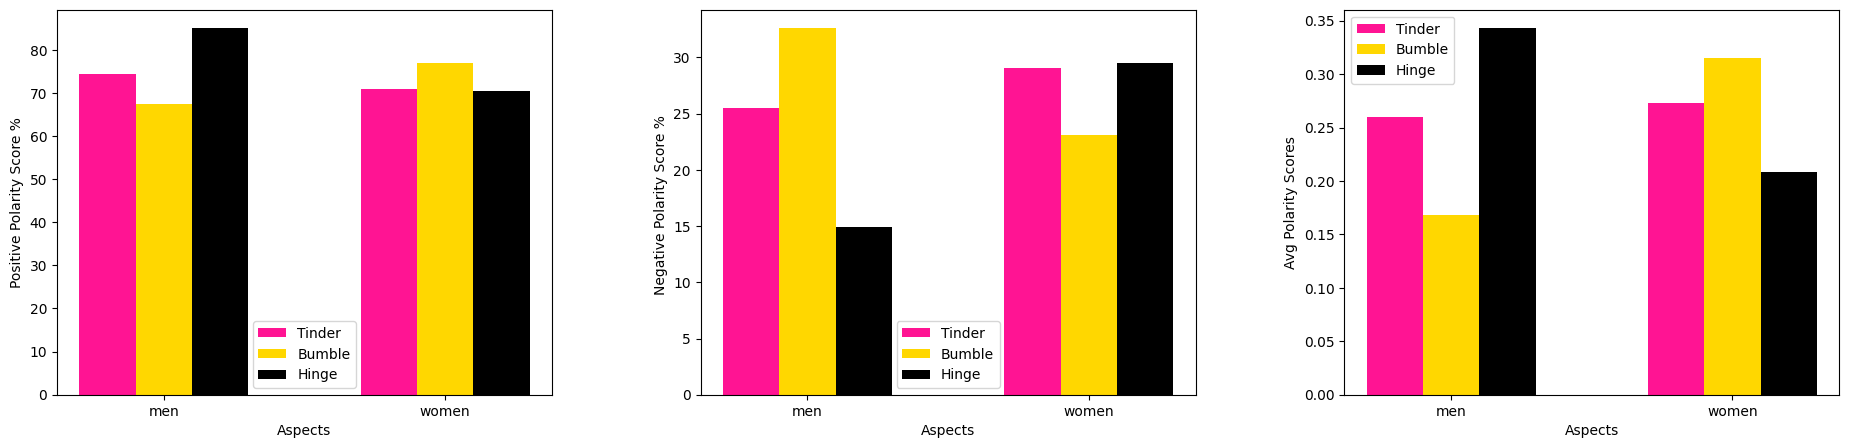

In [182]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["men", "women"], figsize=(23,5))

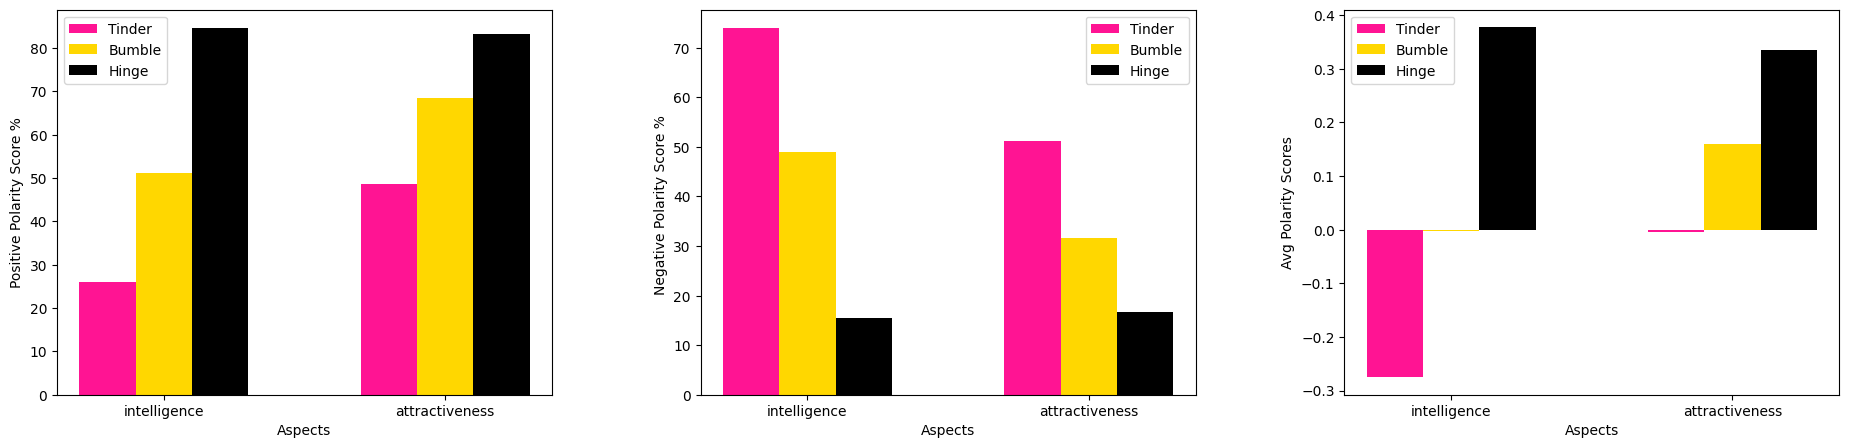

In [184]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["intelligence", "attractiveness"], figsize=(23,5))

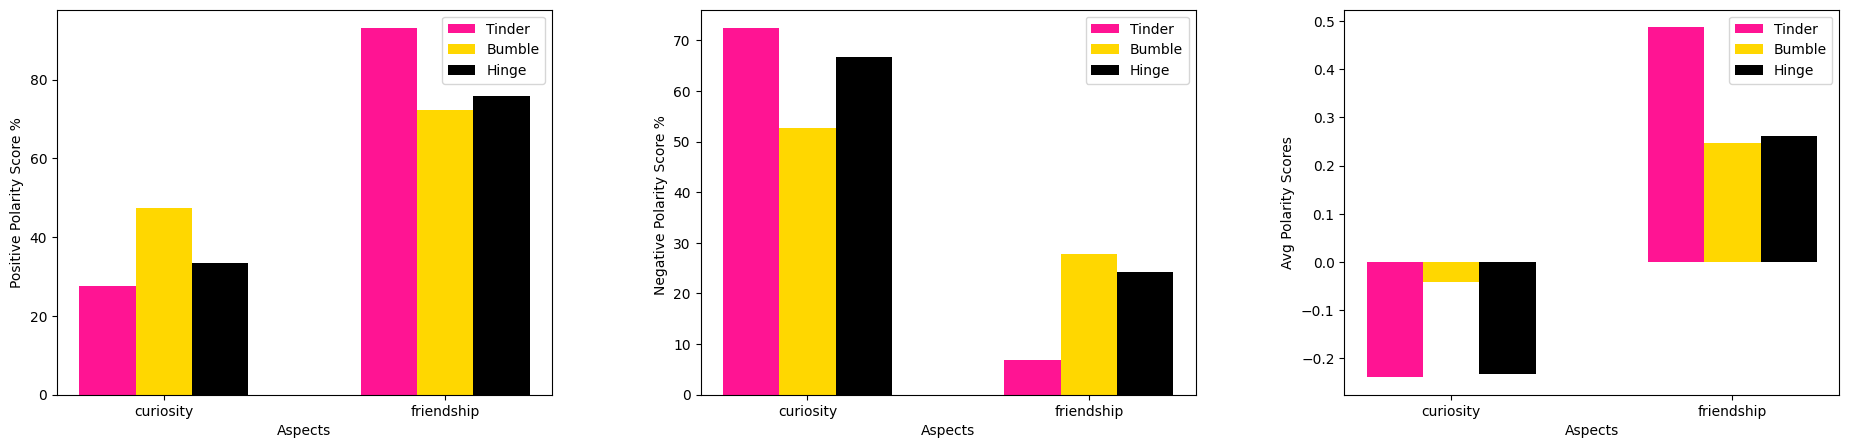

In [185]:
visualizer.plot_apps_polarity(dating_app_polarities, aspects= ["curiosity", "friendship"], figsize=(23,5))